In [ ]:

import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import random


from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications.vgg16 import preprocess_input




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)
train_loader = image_generator.flow_from_directory(
    directory=r"/content/drive/MyDrive/Colab Notebooks/Data/train",
    target_size=(224, 224),
    batch_size=50,
    shuffle=True
)
test_loader = image_generator.flow_from_directory(
    directory=r"/content/drive/MyDrive/Colab Notebooks/Data/test",
    target_size=(224, 224),
    batch_size=50,
    shuffle=True
)
valid_loader = image_generator.flow_from_directory(
    directory=r"/content/drive/MyDrive/Colab Notebooks/Data/valid",
    target_size=(224, 224),
    batch_size=50,
    shuffle=True
)



Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
idx_to_class = {val:key for key, val in dict(train_loader.class_indices).items()}
idx_to_class



{0: 'adenocarcinoma',
 1: 'largecellcarcinoma',
 2: 'normal',
 3: 'squamouscellcarcinoma'}

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))



model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=4, activation="softmax"))



In [ ]:
steps_train = len(train_loader)
steps_test = len(test_loader)
print(steps_test)


7


In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.save("lungcancer200.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

model_train_history = model.fit(
    x= train_loader,
    steps_per_epoch = 9,
    epochs = 100,
    validation_data = test_loader,
    validation_steps = 7
)


Epoch 1/200
9/9 [==============================] - 13s 1s/step - loss: 1.3765 - accuracy: 0.2833 - val_loss: 1.3603 - val_accuracy: 0.3810
Epoch 2/200
9/9 [==============================] - 11s 1s/step - loss: 1.3757 - accuracy: 0.3400 - val_loss: 1.3414 - val_accuracy: 0.3810
Epoch 3/200
9/9 [==============================] - 11s 1s/step - loss: 1.3740 - accuracy: 0.3123 - val_loss: 1.3519 - val_accuracy: 0.3810
Epoch 4/200
9/9 [==============================] - 9s 946ms/step - loss: 1.3782 - accuracy: 0.3002 - val_loss: 1.3568 - val_accuracy: 0.3810
Epoch 5/200
9/9 [==============================] - 10s 1s/step - loss: 1.3704 - accuracy: 0.3267 - val_loss: 1.3425 - val_accuracy: 0.3810
Epoch 6/200
9/9 [==============================] - 8s 930ms/step - loss: 1.3652 - accuracy: 0.3148 - val_loss: 1.3459 - val_accuracy: 0.3810
Epoch 7/200
9/9 [==============================] - 8s 916ms/step - loss: 1.3727 - accuracy: 0.3123 - val_loss: 1.3590 - val_accuracy: 0.3810
Epoch 8/200
9/9 [====

In [ ]:
train_loss = model_train_history.history["loss"]
train_accuracy = model_train_history.history["accuracy"]
test_loss = model_train_history.history["val_loss"]
test_accuracy = model_train_history.history["val_accuracy"]


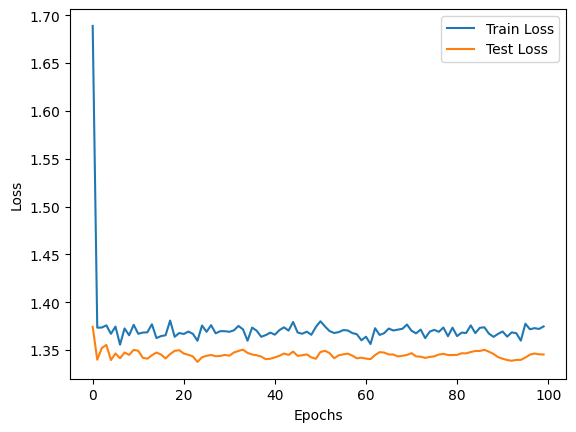

In [ ]:
plt.plot(range(100), train_loss, label = "Train Loss")
plt.plot(range(100), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


<class 'keras.src.preprocessing.image.DirectoryIterator'>
[1. 0. 0. 0.]


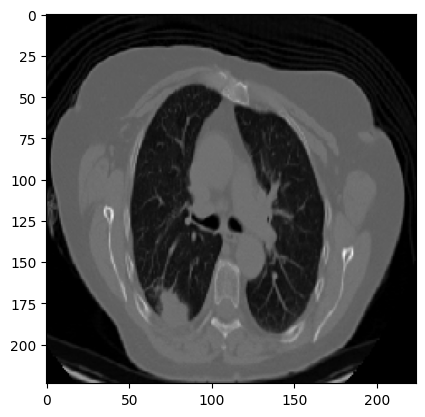

Diagnosis:  adenocarcinoma
Model Prediction:  largecellcarcinom
[1. 0. 0. 0.]


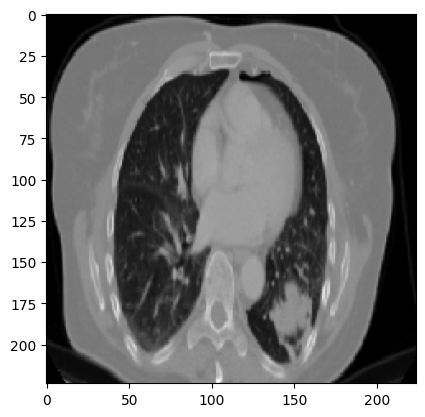

Diagnosis:  adenocarcinoma
Model Prediction:  largecellcarcinom
[0. 0. 1. 0.]


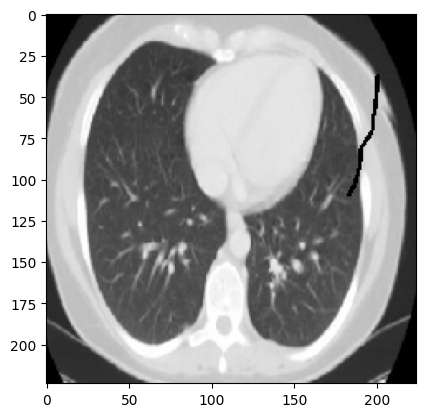

Diagnosis:  normal
Model Prediction:  largecellcarcinom
[0. 0. 0. 1.]


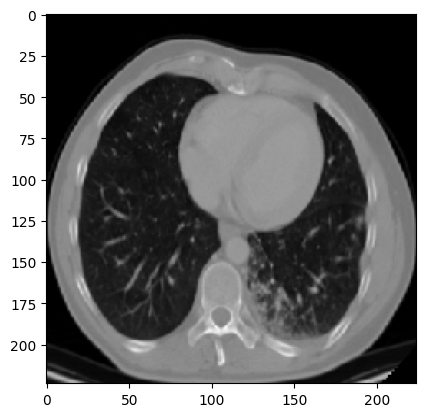

Diagnosis:  squamouscellcarcinoma
Model Prediction:  largecellcarcinom
[1. 0. 0. 0.]


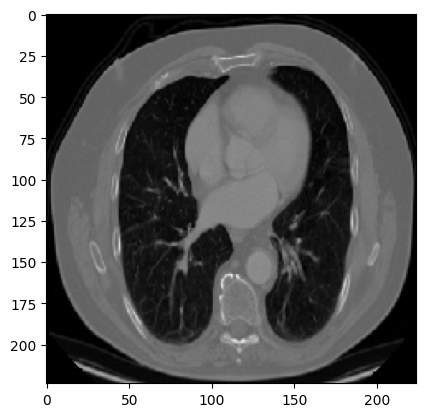

Diagnosis:  adenocarcinoma
Model Prediction:  largecellcarcinom
[0. 0. 1. 0.]


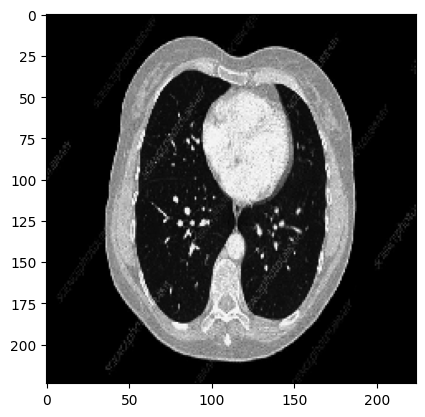

Diagnosis:  normal
Model Prediction:  largecellcarcinom
[0. 0. 0. 1.]


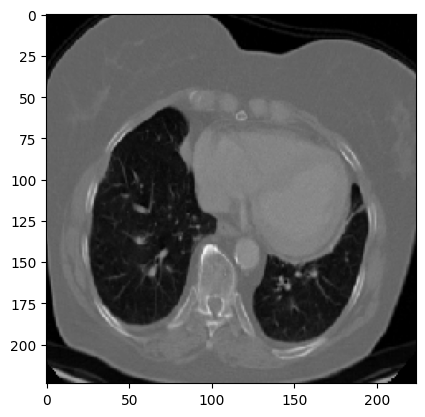

Diagnosis:  squamouscellcarcinoma
Model Prediction:  largecellcarcinom
[0. 0. 0. 1.]


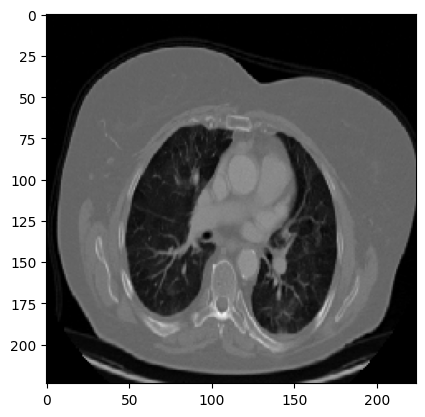

Diagnosis:  squamouscellcarcinoma
Model Prediction:  largecellcarcinom
[0. 1. 0. 0.]


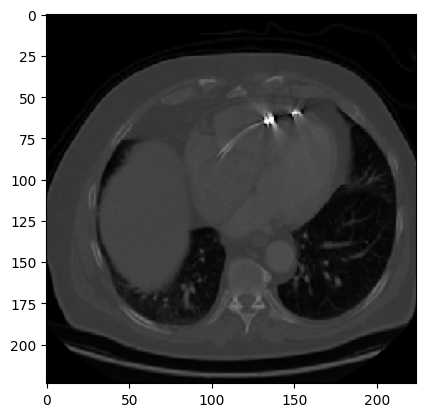

Diagnosis:  largecellcarcinom
Model Prediction:  largecellcarcinom
[1. 0. 0. 0.]


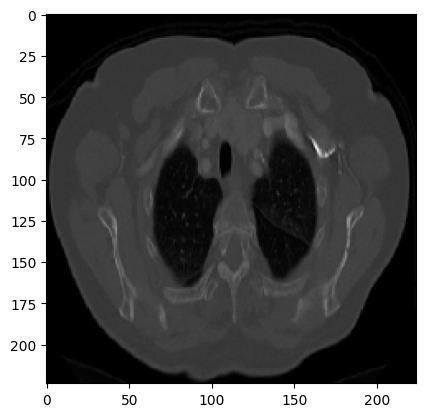

Diagnosis:  adenocarcinoma
Model Prediction:  largecellcarcinom


In [ ]:
pred_list = [f"/content/drive/MyDrive/Colab Notebooks/Data/test/{i}" for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/Data/test")]
print(type(train_loader))
lungcancers=["adenocarcinoma","largecellcarcinom","normal","squamouscellcarcinoma"]
model=load_model("/content/lungcancer200.h5")
for i in range(len(train_loader)):
    images, labels = train_loader.next()
    img = images[0]
    label=labels[0]
    print(labels[0])


    img_arr = np.array(img)
    img_arr = img_arr[np.newaxis, :]
    img_arr = img_arr.astype("float")

    labels_index = np.argmax(label)
    plt.imshow(img)
    plt.show()

    print("==========================================")
    print( "Diagnosis: ",lungcancers[labels_index])
    probability = model(img_arr)
    pred = np.argmax(probability)
    print("Model Prediction: ",lungcancers[pred])
    print("==========================================")


    if i == 9:  # Display first 10 batches
        break